#Import libraries

In [6]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import *
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import plot_confusion_matrix

from sklearn.naive_bayes import *
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

#import graphviz
#from sklearn import svm

#Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data from mapping_traces_O0.csv

#####I read from the csv file only the columns which I am interested in: instructions, source_line and bug

In [3]:
filename = '/content/drive/MyDrive/HOMEWORK 1 ML/mapping_traces_O0.csv'
dataset = pd.read_csv(filename, sep='\t', header=0, names=["instructions", "source_line", "bug"], usecols = [0,1,5])
print('File loaded: %d samples.' %(len(dataset.instructions)))

dataset

File loaded: 100000 samples.


,instructions,source_line,bug
0,movl HIGHVAL l 19 1,int32t l 19 1 = ( -8 ) ;,0
1,movl HIGHVAL l 82 6,int32t l 25 73 = ( -1 ) ;,1
2,movq l 15 07 5 %rcx movq l 15 06 1 %rax movq M...,( * * l 15 06 1 ) = l 15 07 5 ;,0
3,movabsq HIGHVAL %rax cmpq %rax MEM je MEM mova...,( ( g 14 5 = = & l 15 8 ) ? ( void ) ( 0...,1
4,movw HIGHVAL l 41 89,int16t l 41 89 = ( -5 ) ;,0
...,...,...,...
99995,movsbl MEM %eax addq 48 %rsp popq %rbp retq,return g 88 ;,0
99996,movl HIGHVAL l 74 2,int32t l 74 2 = ( -1 ) ;,0
99997,movw MEM %ax movb %al MEM,"struct S 0 l 17 58 = { HIGHVAL , 6 , 14...",1
99998,leaq l 53 %rax movq %rax l 87,int32t * l 87 = & l 53 ;,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   instructions  100000 non-null  object
 1   source_line   100000 non-null  object
 2   bug           100000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


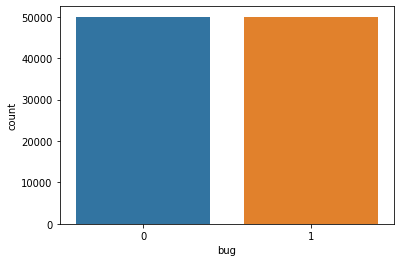

In [7]:
sns.countplot(dataset['bug'])

##Data from blind_test.csv 

In [8]:
filename = '/content/drive/MyDrive/HOMEWORK 1 ML/blind_test.csv'
blind_dataset = pd.read_csv(filename, sep='\t', header=0, names=["instructions", "source_line"], usecols = [0,1])
print('File loaded: %d samples.' %(len(blind_dataset.instructions)))

blind_dataset

File loaded: 10000 samples.


,instructions,source_line
0,movl HIGHVAL MEM cmpl 7 MEM jne MEM,volatile int32t l 48 76 = 0 ;
1,movl MEM %eax subl 1 %eax movl %eax MEM jmp ME...,for ( p 81 = 0 ; ( p 81 > = 0 ) ; p 81...
2,leaq l 53 72 %rax movq %rax l 58 31,int32t * l 58 31 = & l 53 72 ;
3,leaq l 47 %rax movq %rax l 65,int32t * l 65 = & l 47 ;
4,movq MEM %rax cmpl 0 MEM je MEM,if ( ( * g 31 79 ) )
...,...,...
9995,movl 9 l 51 76,int32t l 45 69 = ( - 1 ) ;
9996,"leaq l 21 %rdi movabsq ""< `"" %rsi movl HIGHVAL...",int32t * l 21 [ 7 ] [ 5 ] [ 7 ] = { { { & ...
9997,movabsq HIGHVAL %rax movq %rax l 16 50,int8t * * * * * l 16 50 = & g 13 65 ;
9998,movabsq HIGHVAL %rax movq %rax l 81 4,int32t * * * l 81 4 = & g 82 ;


#Vectorization of the data

In [9]:
vectorizer = CountVectorizer() 

##Vectorization of normal dataset

In [10]:
X_all = vectorizer.fit_transform(dataset.instructions + dataset.source_line)
print(X_all.shape) 

y_all = dataset.bug
print(y_all.shape)

(100000, 1235)
(100000,)


##Vectorization of blind dataset

In [11]:
X_blind = vectorizer.transform(blind_dataset.instructions + blind_dataset.source_line)
print(X_blind.shape) 

(10000, 1235)


#Splitting the data in training and testing set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=16) #16

print("Train: %d - Test: %d" %(X_train.shape[0],X_test.shape[0]))


Train: 80000 - Test: 20000


#Creat and fit Naive Bayes models

####Bernoulli Naive Bayes

In [14]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [15]:
acc_train_B = model.score(X_train, y_train)    
acc_test_B = model.score(X_test, y_test)

####Multinomial Naive Bayes

In [18]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [19]:
acc_train_M = model.score(X_train, y_train)    
acc_test_M = model.score(X_test, y_test)

####Gaussian Naive Bayes

In [20]:
model = GaussianNB()
model.fit(X_train.toarray(), y_train)

GaussianNB()

In [21]:
acc_train_G = model.score(X_train.toarray(), y_train)    
acc_test_G = model.score(X_test.toarray(), y_test)

####Compare the accuracy for these models

In [22]:
from tabulate import tabulate
print(tabulate([['Bernoulli Naive Bayes', acc_train_B, acc_test_B], 
                ['Multinomial Naive Bayes', acc_train_M, acc_test_M], 
                ['Gaussian Naive Bayes', acc_train_G, acc_test_G]], headers=['Classifier', 'Accuracy on train set', 'Accuracy on test set']))

Classifier                 Accuracy on train set    Accuracy on test set
-----------------------  -----------------------  ----------------------
Bernoulli Naive Bayes                   0.708538                 0.7058
Multinomial Naive Bayes                 0.554937                 0.53835
Gaussian Naive Bayes                    0.563438                 0.55485


#Create and fit Decision Tree model

##Without pruning

####Model

In [49]:
model =  tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [50]:
print("Depth: ",model.get_depth())
print("Number of leaves: ",model.get_n_leaves())
print("Number of nodes: ",model.tree_.node_count)

Depth:  119
Number of leaves:  6601
Number of nodes:  13201


####Metrics


In [51]:
acc1 = model.score(X_train, y_train)    
acc2 = model.score(X_test, y_test)
print("Accuracy on train set %.3f" %acc1) 
print("Accuracy on test set %.3f" %acc2)

Accuracy on train set 1.000
Accuracy on test set 0.918


######Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


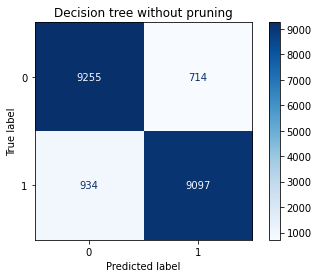

In [52]:
class_names=["0","1"]
disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format="g"
                                 )
plt.title("Decision tree without pruning")
plt.show()

######Classification report

In [53]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9969
           1       0.93      0.91      0.92     10031

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



##Pruning

####Model

In [30]:
classifier = tree.DecisionTreeClassifier()
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

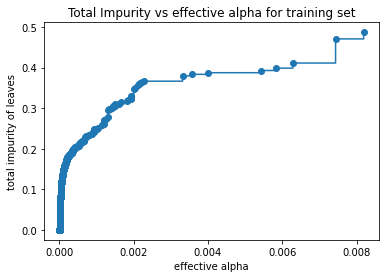

In [31]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [32]:
len(ccp_alphas)

2244

In [66]:
to = 200
clfs = []
for ccp_alpha in ccp_alphas[:to]:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

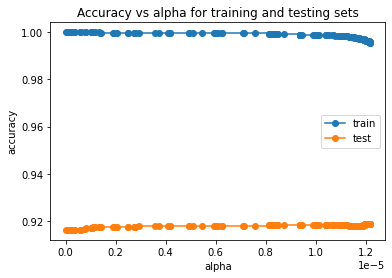

In [67]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:to], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:to], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Text(0.5, 1.0, 'Number of nodes vs alpha')

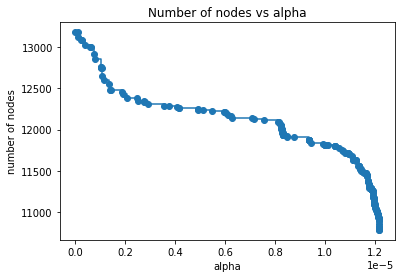

In [68]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:to], node_counts, marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")

In [69]:
ccp_alpha = ccp_alphas[to-1]
model =  tree.DecisionTreeClassifier(ccp_alpha=ccp_alpha).fit(X_train, y_train)
print('Decision Tree Model created')

Decision Tree Model created


In [70]:
print("Depth: ",model.get_depth())
print("Number of leaves: ",model.get_n_leaves())
print("Number of nodes: ",model.tree_.node_count)

Depth:  93
Number of leaves:  5361
Number of nodes:  10721


####Metrics

In [71]:
acc1 = model.score(X_train, y_train)    
acc2 = model.score(X_test, y_test)
print("Accuracy on train set %.3f" %acc1) 
print("Accuracy on test set %.3f" %acc2)

Accuracy on train set 0.995
Accuracy on test set 0.919


######Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


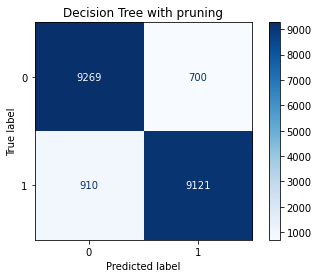

In [72]:
class_names=["0","1"]
disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format="g"
                                 )
plt.title("Decision Tree with pruning")
plt.show()

######Classification report

In [73]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      9969
           1       0.93      0.91      0.92     10031

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



#Create and fit Random Forest model

####Model

In [85]:
forest_model = RandomForestClassifier(ccp_alpha=ccp_alpha).fit(X_train, y_train)
print('Random Forest Model created')

Random Forest Model created


####Metrics

In [86]:
acc1 = forest_model.score(X_train, y_train)    
acc2 = forest_model.score(X_test, y_test)
print("Accuracy on train set %.3f" %acc1) 
print("Accuracy on test set %.3f" %acc2)

Accuracy on train set 0.993
Accuracy on test set 0.954


######Confusion matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


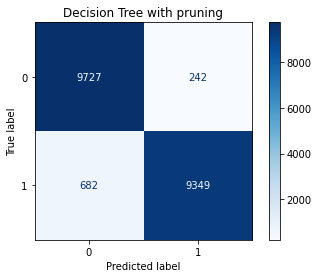

In [87]:
class_names=["0","1"]
disp = plot_confusion_matrix(forest_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 values_format="g"
                                 )
plt.title("Decision Tree with pruning")
plt.show()

######Classification report

In [88]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9969
           1       0.98      0.93      0.95     10031

    accuracy                           0.95     20000
   macro avg       0.96      0.95      0.95     20000
weighted avg       0.96      0.95      0.95     20000



#Prediction on blind set


In [91]:
y_blind = forest_model.predict(X_blind)

####Creation of txt file with responses

In [92]:
f = open('/content/drive/MyDrive/HOMEWORK 1 ML/predictions.txt', "r+")
f.truncate(0) #if the file is already written from past executions then clear it

for prediction in y_blind:
  with open('/content/drive/MyDrive/HOMEWORK 1 ML/predictions.txt', 'a') as f:
    f.write('\n'+prediction.astype(str))
